In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import linregress

# importing trap data
# spring
trap_SP_all = pd.read_csv('scatter_plots_SSC_traps/corrected/SP_trap_scatterplot_data_all.csv')
trap_SP_closed = pd.read_csv('scatter_plots_SSC_traps/corrected/SP_trap_scatterplot_data_closed.csv')
trap_SP_open = pd.read_csv('scatter_plots_SSC_traps/corrected/SP_trap_scatterplot_data_open.csv')
# summer
trap_SM_all = pd.read_csv('scatter_plots_SSC_traps/corrected/SM_trap_scatterplot_data_all.csv')
trap_SM_closed = pd.read_csv('scatter_plots_SSC_traps/corrected/SM_trap_scatterplot_data_closed.csv')
trap_SM_open = pd.read_csv('scatter_plots_SSC_traps/corrected/SM_trap_scatterplot_data_open.csv')

# importing SSC data
# spring
SSC_SP_all = pd.read_csv('scatter_plots_SSC_traps/corrected/SP_SSC_scatterplot_data_corrected.csv')
# summer
SSC_SM_all = pd.read_csv('scatter_plots_SSC_traps/corrected/SM_SSC_scatterplot_data_corrected.csv')

Change classification name

In [2]:
replace_dict = {
    'CS': 'Coarse Sand',
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
}

dfs = [
    trap_SP_all, trap_SP_closed, trap_SP_open,
    trap_SM_all, trap_SM_closed, trap_SM_open,
    SSC_SM_all, SSC_SP_all]

for df in dfs:
    df['Class'] = df['Class'].replace(replace_dict)

### Merge Dataframes for plotting

In [3]:
# merge trap and SSC data by season with custom suffixes
summer_all = trap_SM_all.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
summer_open = trap_SM_open.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
summer_closed = trap_SM_closed.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))

spring_all = trap_SP_all.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
spring_open = trap_SP_open.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
spring_closed = trap_SP_closed.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))

## PDF plots 

Individual - Non-normalized

=== PDF Plots: Size Distribution Comparison ===

1. Spring Season - All Traps


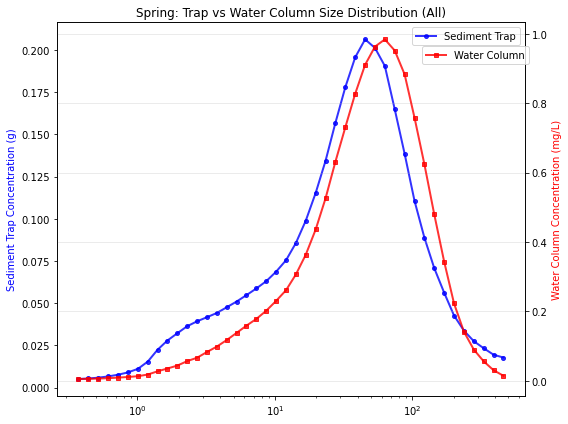

2. Spring Season - Open Traps


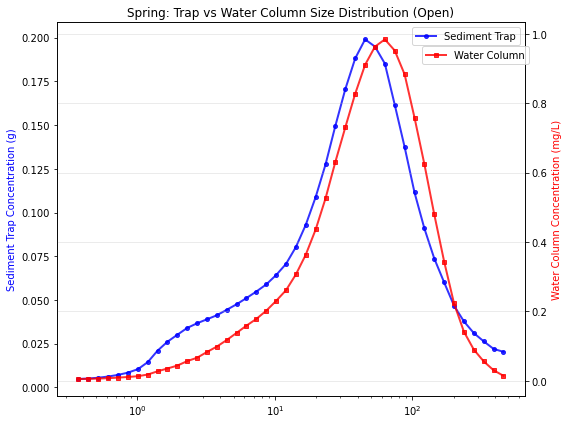

3. Spring Season - Closed Traps


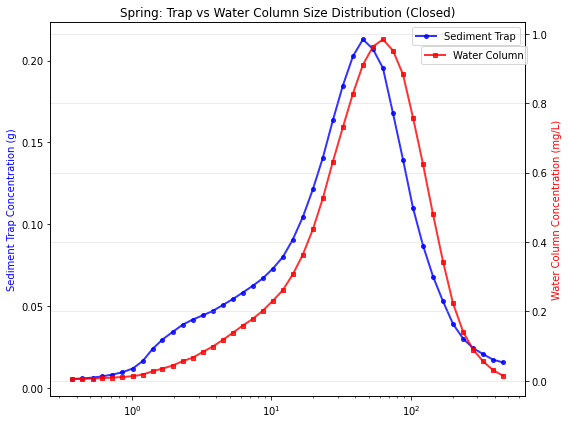

4. Summer Season - All Traps


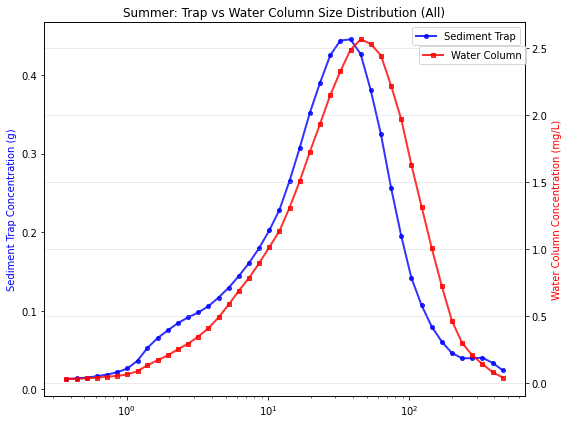

5. Summer Season - Open Traps


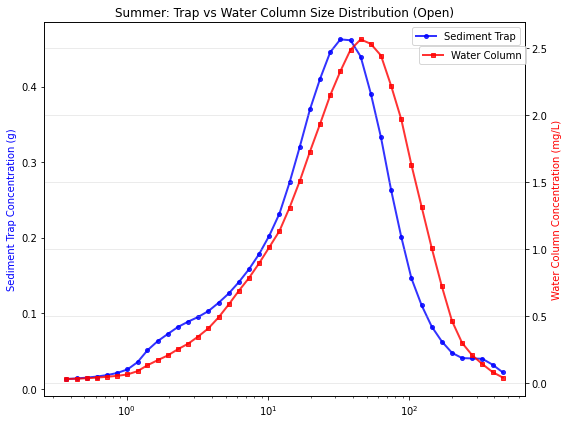

6. Summer Season - Closed Traps


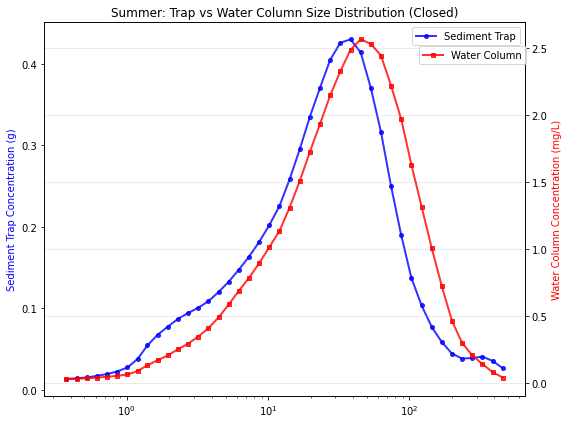

In [4]:
# we'll create plots for both seasons and trap types

def plot_pdf_comparison(trap_data, ssc_data, title, save_name=None):
    """
    Plot PDF comparing trap and SSC data
    """
    plt.figure(figsize=(8, 6))
    
    # Plot trap data
    plt.plot(trap_data['Size'], trap_data['Avg'], 
            color='blue', linewidth=2, marker='o', markersize=4,
            label='Sediment Trap', alpha=0.8)
    
    plt.ylabel('Sediment Trap Concentration (g)', color='blue')
    plt.legend()

    # Twin y axis for SSC data
    plt.twinx()
    plt.plot(ssc_data['Size'], ssc_data['Avg'],
            color='red', linewidth=2, marker='s', markersize=4,
            label='Water Column', alpha=0.8)
    
    plt.xlabel('Grain Size (μm)')
    plt.ylabel('Water Column Concentration (mg/L)', color='red')
    plt.title(title)
    plt.xscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(0.77, 0.95))
    plt.tight_layout()
    
    if save_name:
        plt.savefig(f'plots/{save_name}.jpg', dpi=300, bbox_inches='tight')
    
    plt.show()

# Create PDF plots for different combinations
print("=== PDF Plots: Size Distribution Comparison ===\n")

# Spring - All traps
print("1. Spring Season - All Traps")
plot_pdf_comparison(trap_SP_all, SSC_SP_all, 
                    'Spring: Trap vs Water Column Size Distribution (All)', 
                    'spring_all_pdf')

# Spring - Open traps  
print("2. Spring Season - Open Traps")
plot_pdf_comparison(trap_SP_open, SSC_SP_all,
                    'Spring: Trap vs Water Column Size Distribution (Open)',
                    'spring_open_pdf')

# Spring - Closed traps
print("3. Spring Season - Closed Traps") 
plot_pdf_comparison(trap_SP_closed, SSC_SP_all,
                    'Spring: Trap vs Water Column Size Distribution (Closed)',
                    'spring_closed_pdf')

# Summer - All traps
print("4. Summer Season - All Traps")
plot_pdf_comparison(trap_SM_all, SSC_SM_all,
                    'Summer: Trap vs Water Column Size Distribution (All)',
                    'summer_all_pdf')

# Summer - Open traps
print("5. Summer Season - Open Traps")
plot_pdf_comparison(trap_SM_open, SSC_SM_all,
                    'Summer: Trap vs Water Column Size Distribution (Open)', 
                    'summer_open_pdf')

# Summer - Closed traps
print("6. Summer Season - Closed Traps")
plot_pdf_comparison(trap_SM_closed, SSC_SM_all,
                    'Summer: Trap vs Water Column Size Distribution (Closed)',
                    'summer_closed_pdf')

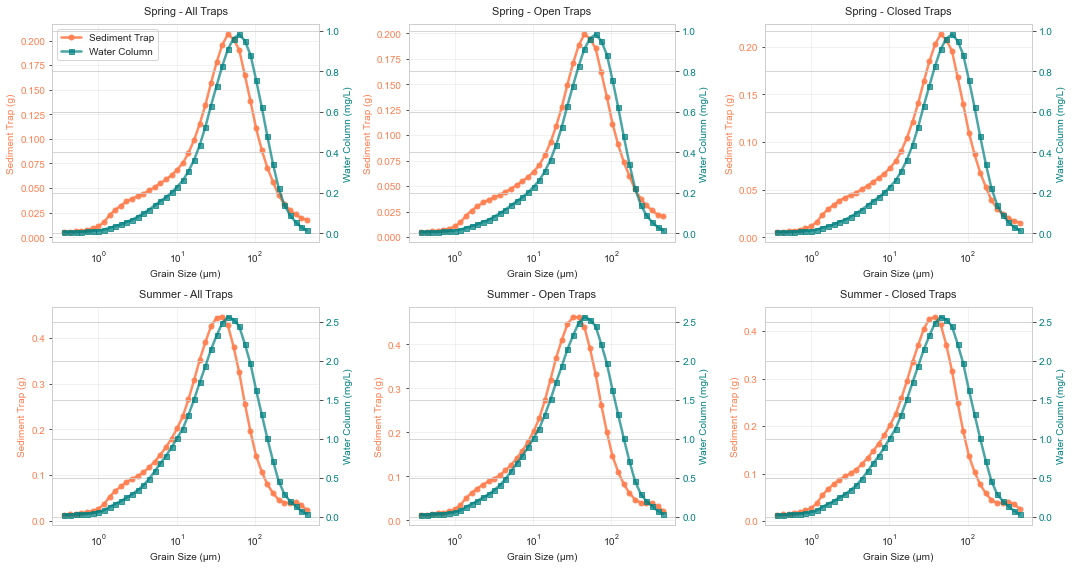

In [5]:
#  subplots of all baskets by season
sns.set_style("whitegrid")

def plot_pdf_subplots_by_season():
    """
    Create subplot comparison of PDFs by season and trap type
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Define data combinations using your merged dataframes
    plot_configs = [
        # Spring row
        (spring_all, 'Spring - All Traps', 0, 0),
        (spring_open, 'Spring - Open Traps', 0, 1), 
        (spring_closed, 'Spring - Closed Traps', 0, 2),
        # Summer row
        (summer_all, 'Summer - All Traps', 1, 0),
        (summer_open, 'Summer - Open Traps', 1, 1),
        (summer_closed, 'Summer - Closed Traps', 1, 2)
    ]
    
    for merged_data, title, row, col in plot_configs:
        ax = axes[row, col]
        
        # Plot trap data
        line1 = ax.plot(merged_data['Size'], merged_data['Avg_trap'],
                color='coral', linewidth=2.5, marker='o', markersize=5,
                label='Sediment Trap', alpha=0.9)
        
        ax.set_ylabel('Sediment Trap (g)', color='coral')
        ax.tick_params(axis='y', labelcolor='coral')
        
        # Create twin y-axis for SSC data
        ax2 = ax.twinx()
        line2 = ax2.plot(merged_data['Size'], merged_data['Avg_SSC'], 
                color='teal', linewidth=2.5, marker='s', markersize=5,
                label='Water Column', alpha=0.7)
        
        ax2.set_ylabel('Water Column (mg/L)', color='teal')
        ax2.tick_params(axis='y', labelcolor='teal')
        
        ax.set_xlabel('Grain Size (μm)')
        ax.set_title(title, fontsize=11, pad=10)
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3)
        
        # Add combined legend only to first subplot
        if row == 0 and col == 0:
            lines = line1 + line2
            labels = [l.get_label() for l in lines]
            ax.legend(lines, labels, loc='upper left')
    
    plt.tight_layout()
    plt.savefig('plots/pdf_comparison_subplots.jpg', dpi=500, bbox_inches='tight')
    plt.show()
plot_pdf_subplots_by_season()

spring ssc total is 13.042404762000002
spring trap total is 3.1682750010000005
summer ssc total is 38.791612244
summer trap total is 6.588645458


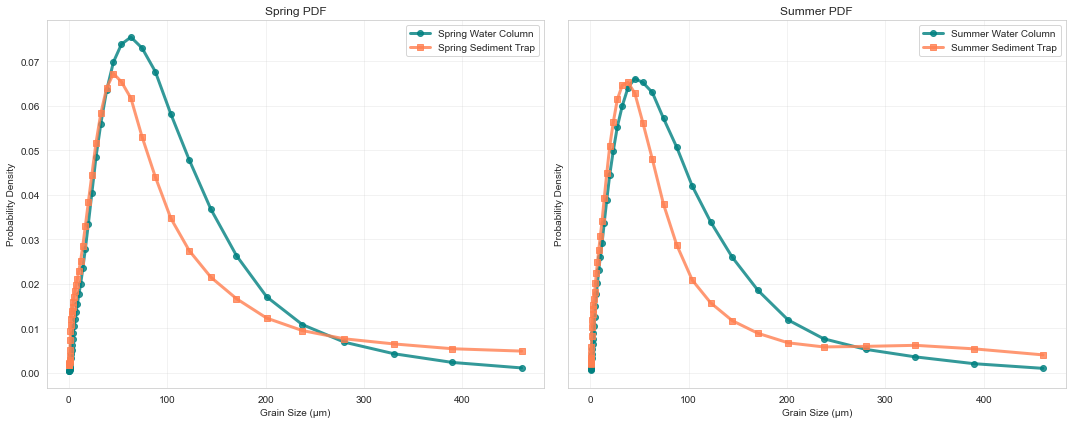

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# Spring comparison
spring_ssc = SSC_SP_all.copy()
spring_trap = trap_SP_closed.copy()
# Summer comparison  
summer_ssc = SSC_SM_all.copy()
summer_trap = trap_SM_closed.copy()

# Spring - True PDF (area = 1)
ax1 = axes[0]
spring_ssc_total = sum(spring_ssc['Avg'])
print('spring ssc total is', spring_ssc_total)
spring_trap_total = sum(spring_trap['Avg'])
print('spring trap total is', spring_trap_total)

spring_ssc_pdf = spring_ssc['Avg'] / spring_ssc_total  
spring_trap_pdf = spring_trap['Avg'] / spring_trap_total  

ax1.plot(spring_ssc['Size'], spring_ssc_pdf,
        color='teal', linewidth=3, marker='o', markersize=6,
        label='Spring Water Column', alpha=0.8)
ax1.plot(spring_trap['Size'], spring_trap_pdf,
        color='coral', linewidth=3, marker='s', markersize=6,
        label='Spring Sediment Trap', alpha=0.8)

ax1.set_xlabel('Grain Size (μm)')
ax1.set_ylabel('Probability Density')
ax1.set_title('Spring PDF')
#ax1.set_xscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Summer - True PDF (area = 1)
ax2 = axes[1]
summer_ssc_total = sum(summer_ssc['Avg'])
print('summer ssc total is',summer_ssc_total)
summer_trap_total = sum(summer_trap['Avg'])
print('summer trap total is',summer_trap_total)

summer_ssc_pdf = summer_ssc['Avg'] / summer_ssc_total
summer_trap_pdf = summer_trap['Avg'] / summer_trap_total

ax2.plot(summer_ssc['Size'], summer_ssc_pdf,
        color='teal', linewidth=3, marker='o', markersize=6,
        label='Summer Water Column', alpha=0.8)
ax2.plot(summer_trap['Size'], summer_trap_pdf,
        color='coral', linewidth=3, marker='s', markersize=6,
        label='Summer Sediment Trap', alpha=0.8)

ax2.set_xlabel('Grain Size (μm)')
ax2.set_ylabel('Probability Density')
ax2.set_title('Summer PDF')
#ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('plots/normalized_PDFs.jpg', dpi=300, bbox_inches='tight')
plt.show()

=== Spring vs Summer Water Column Comparison ===


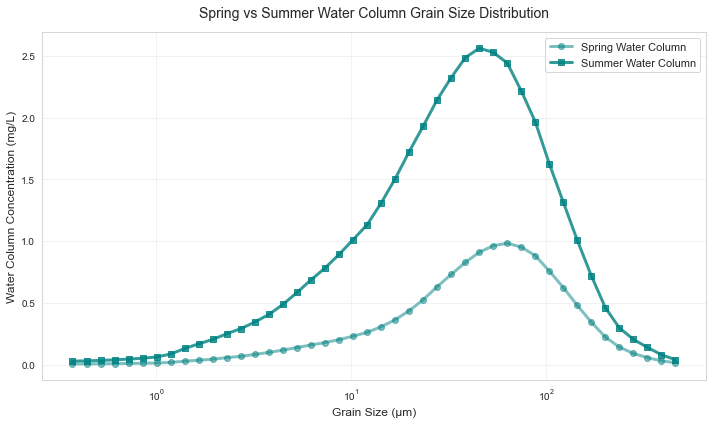


Summary Statistics:
Spring Water Column:
  Mean concentration: 0.296 mg/L
  Max concentration: 0.984 mg/L
  Peak at size: 63.1 μm

Summer Water Column:
  Mean concentration: 0.882 mg/L
  Max concentration: 2.564 mg/L
  Peak at size: 45.3 μm


In [7]:
# Compare Spring vs Summer Water Column Data
def plot_spring_summer_ssc_comparison():
    """
    Plot comparison of spring and summer water column (SSC) data
    """
    plt.figure(figsize=(10, 6))
    
    # Plot spring SSC data
    plt.plot(SSC_SP_all['Size'], SSC_SP_all['Avg'],
            color='teal', linewidth=3, marker='o', markersize=6,
            label='Spring Water Column', alpha=0.5)
    
    # Plot summer SSC data
    plt.plot(SSC_SM_all['Size'], SSC_SM_all['Avg'],
            color='teal', linewidth=3, marker='s', markersize=6,
            label='Summer Water Column', alpha=0.8)
    
    plt.xlabel('Grain Size (μm)', fontsize=12)
    plt.ylabel('Water Column Concentration (mg/L)', fontsize=12)
    plt.title('Spring vs Summer Water Column Grain Size Distribution', fontsize=14, pad=15)
    plt.xscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('plots/spring_summer_ssc_comparison.jpg', dpi=300, bbox_inches='tight')
    plt.show()

print("=== Spring vs Summer Water Column Comparison ===")
plot_spring_summer_ssc_comparison()

# Print some summary statistics
print("\nSummary Statistics:")
print("Spring Water Column:")
print(f"  Mean concentration: {SSC_SP_all['Avg'].mean():.3f} mg/L")
print(f"  Max concentration: {SSC_SP_all['Avg'].max():.3f} mg/L")
print(f"  Peak at size: {SSC_SP_all.loc[SSC_SP_all['Avg'].idxmax(), 'Size']:.1f} μm")

print("\nSummer Water Column:")
print(f"  Mean concentration: {SSC_SM_all['Avg'].mean():.3f} mg/L")
print(f"  Max concentration: {SSC_SM_all['Avg'].max():.3f} mg/L")
print(f"  Peak at size: {SSC_SM_all.loc[SSC_SM_all['Avg'].idxmax(), 'Size']:.1f} μm")